In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [6]:
ls

AlleleFre.ipynb
MGYG000000002_allele_frequency_changes_mean.tsv.gz
MGYG000000002_allele_frequency_changes_no_zero-diff.tsv.gz
MGYG000000002_allele_frequency_changes.tsv.gz
MGYG000000002_allele_frequency_longitudinal.tsv.gz


In [28]:
# Load the data
file = "MGYG000000002_allele_frequency_changes_no_zero-diff.tsv.gz"
df_longitudinal = pd.read_csv(file, sep='\t')
df_longitudinal.head()

,subjectID,gene_id,contig,position,replicate,group,total_coverage_initial,total_coverage_second,total_coverage_combined,A_frequency_initial,...,G_frequency_initial,C_frequency_initial,A_frequency_second,T_frequency_second,G_frequency_second,C_frequency_second,A_frequency_diff,T_frequency_diff,G_frequency_diff,C_frequency_diff
0,M2047,NaN,MGYG000000002_1,36,14,control,1,1,2,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,M2047,NaN,MGYG000000002_1,40,14,control,1,1,2,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,M2047,NaN,MGYG000000002_1,46,14,control,1,1,2,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,M2047,MGYG000000002_1_4,MGYG000000002_1,4685,14,control,1,3,4,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,1.0
4,M2047,MGYG000000002_1_4,MGYG000000002_1,4693,14,control,1,3,4,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,1.0,0.0,0.0


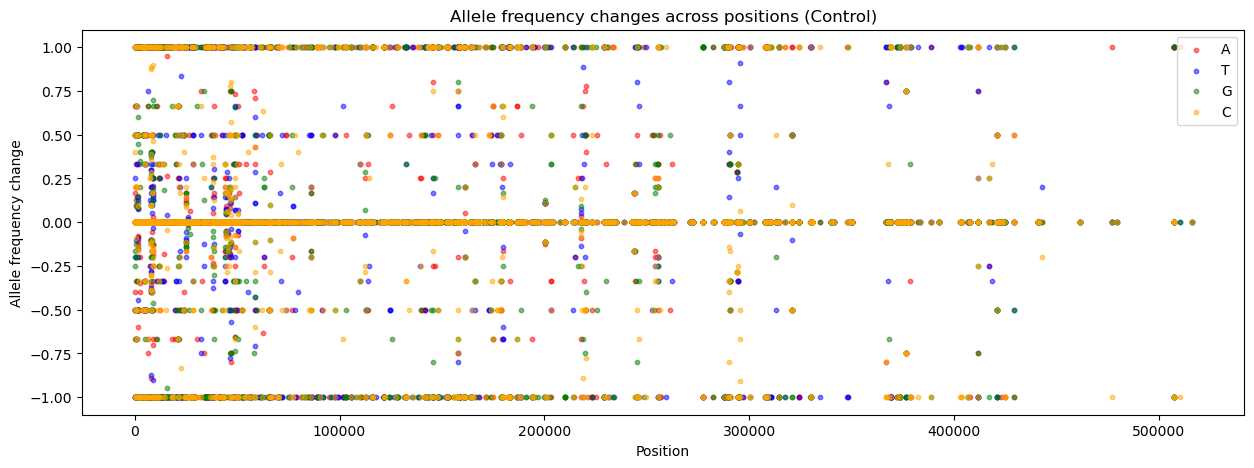

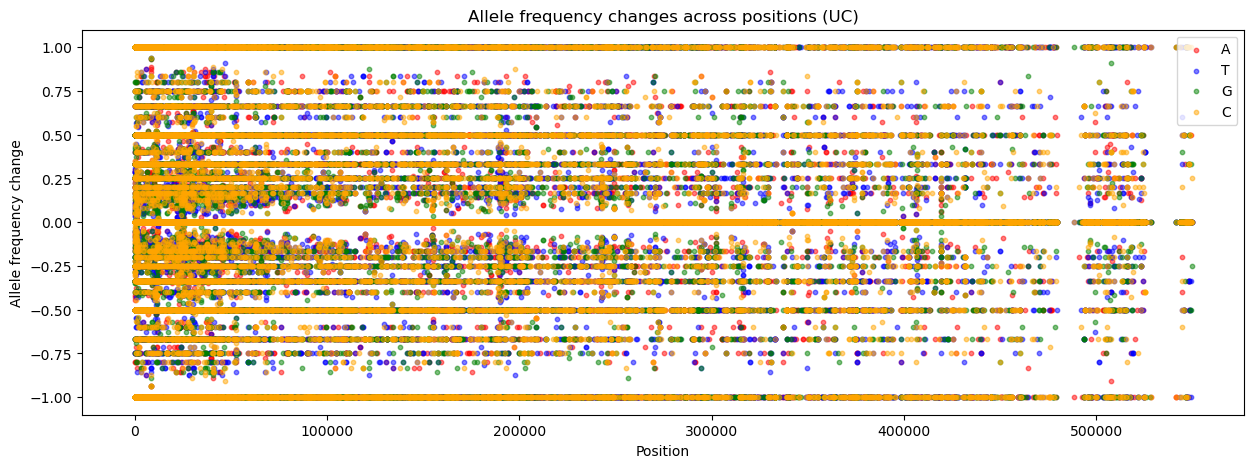

In [27]:
# First, melt the diff columns to long format
df_melt = df_longitudinal.melt(
    id_vars=['subjectID','gene_id','contig','position','replicate','group'],
    value_vars=['A_frequency_diff', 'T_frequency_diff', 'G_frequency_diff', 'C_frequency_diff'],
    var_name='allele', value_name='freq_change'
)

# Split the groups
df_control = df_melt[df_melt['group']=='control']
df_UC = df_melt[df_melt['group']=='UC']

# Function to plot a group
def plot_group(df_group, group_name):
    plt.figure(figsize=(15,5))
    alleles = df_group['allele'].unique()
    colors = {'A_frequency_diff':'red', 'T_frequency_diff':'blue',
              'G_frequency_diff':'green','C_frequency_diff':'orange'}

    for allele in alleles:
        subset = df_group[df_group['allele']==allele]
        plt.scatter(subset['position'], subset['freq_change'], 
                    label=allele.replace('_frequency_diff',''), 
                    color=colors[allele], alpha=0.5, s=10)

    plt.xlabel('Position')
    plt.ylabel('Allele frequency change')
    plt.title(f'Allele frequency changes across positions ({group_name})')
    plt.legend()
    plt.show()

# Plot Control
plot_group(df_control, 'Control')

# Plot UC
plot_group(df_UC, 'UC')


In [29]:
file = "MGYG000000002_allele_frequency_longitudinal.tsv.gz"
df_longitudinal = pd.read_csv(file, sep='\t')
df_longitudinal.head()

,MAG_ID,contig,position,ref_base,total_coverage,A,C,G,T,N,...,group,subjectID,replicate,time,breadth,genome_size,A_frequency,T_frequency,G_frequency,C_frequency
0,MGYG000000002,MGYG000000002_1,36,T,1,0,0,0,1,0,...,control,M2047,14,second,0.107042,4441003,0.0,1.0,0.0,0.0
1,MGYG000000002,MGYG000000002_1,37,G,1,0,0,1,0,0,...,control,M2047,14,second,0.107042,4441003,0.0,0.0,1.0,0.0
2,MGYG000000002,MGYG000000002_1,38,T,1,0,0,0,1,0,...,control,M2047,14,second,0.107042,4441003,0.0,1.0,0.0,0.0
3,MGYG000000002,MGYG000000002_1,39,T,1,0,0,0,1,0,...,control,M2047,14,second,0.107042,4441003,0.0,1.0,0.0,0.0
4,MGYG000000002,MGYG000000002_1,40,T,1,0,0,0,1,0,...,control,M2047,14,second,0.107042,4441003,0.0,1.0,0.0,0.0
